In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def norm(p):
    a=np.zeros(len(p))
    a=(p-p.mean())/(np.std(p)+1e-15)
    return a

def normalize(x):
    m,n=x.shape
    p=np.zeros(n)
    x1=np.zeros((m,n))
    for i in range(n):
        p=x[:,i]
        a=norm(p)
        x1[:,i]=a
    return x1

In [27]:
def compute_cost(x,y,w,b,lambda_):
    m,n=x.shape #m is examples,n is features
    Y=np.dot(w,x.T)+b
    a=(Y-y)**2/(2*m)
    c=a.sum()+lambda_*((np.abs(w)).sum())/(2*m)
    return c
    

In [28]:
def cost_der(x,y,w,b,lambda_):
    m,n=x.shape
    dw=np.dot((np.dot(w,x.T)+b-y),x)/(m)+lambda_*(np.sign(w))/(m)
    db=(np.dot(w,x.T)+b-y)/m
    return dw,db.sum()

In [29]:
def grad_desc(x,y,alpha,iter,lambda_=100):
    m,n=x.shape #m is examples,n is features
    w_in=np.random.normal(loc=0, scale=0.000001, size=(n,))
    b_in=np.random.normal(loc=0, scale=0.000001, size=(1,))
    cost=[]
    for i in range(iter):
        dw,db=cost_der(x,y,w_in,b_in,lambda_)
        w_in-=alpha*dw
        b_in-=alpha*db
        c=compute_cost(x,y,w_in,b_in,lambda_)
        cost.append(c)
        if i%(iter//10)==0:
            print('iter:',i,'cost:    ',compute_cost(x,y,w_in,b_in,lambda_))
    return w_in,b_in,cost

In [30]:
def calculate_r2_score(y,prediction):
    
    mean_actual=np.mean(y)   
    sst=np.sum((y-mean_actual)**2)   
    ssr=np.sum((y-prediction)**2)
    r2_score=1-(ssr/sst)
    return r2_score
def pred(x,w,b):
    p=np.dot(w,x.T)+b
    return p

In [31]:
def pol_feat(x,degree):
    x1,x2,x3=x.T
    n=(degree+3)*(degree+2)*(degree+1)//6 -1
    m=0
    a=np.zeros((n,len(x1)))
    for i in range(degree+1):
        for j in range(degree+1):
            for k in range(degree+1):
                if i+j+k<=degree and i+j+k!=0:
                    a[m]=x1**i*x2**j*x3**k
                    m+=1
    return a.T 

In [32]:
def train_test_split(x,y,test_size):
    m,n=x.shape
    indices=np.arange(m)
    #print(m)
    p=np.random.permutation(indices)
    #print(p.shape)
    x_test=x[p][:int(m*test_size)]
    y_test=y[p][:int(m*test_size)]
    x_train=x[p][int(m*test_size):]
    #print(x[p].shape)
    #print(x_train.shape)
    y_train=y[p][int(m*test_size):]
    #print(y_train.shape)
    return x_train,y_train,x_test,y_test

In [33]:
df=pd.read_csv('Polynomialdata_train.csv')
df

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [34]:
y=df['target']
x=df.drop(['target'],axis=1)
x_train=x.to_numpy()
y_train=y.to_numpy()


In [35]:
x=normalize(pol_feat(x_train,6))
x_train1,y_train1,x_train_cv,y_train_cv=train_test_split(x,y_train,0.2)

In [36]:
#ab=(pol_feat(x_train1,6))
#ac=(pol_feat(x_train_cv,6))


In [37]:
w,b,cost=grad_desc(x_train1,y_train1,2.8e-1,10000,0)

iter: 0 cost:     20760669828265.29
iter: 1000 cost:     194620834.9537679
iter: 2000 cost:     394082.8821552454
iter: 3000 cost:     1683.856630320881
iter: 4000 cost:     13.670565482440146
iter: 5000 cost:     0.13509292215690621
iter: 6000 cost:     0.0013907003551332806
iter: 7000 cost:     1.4465324833764179e-05
iter: 8000 cost:     1.5102971894200128e-07
iter: 9000 cost:     1.5796050696983924e-09


In [38]:
predi=pred(x_train1,w,b) #train
calculate_r2_score(y_train1,predi)

1.0

In [39]:
predi1=pred(x_train_cv,w,b) #cv
calculate_r2_score(y_train_cv,predi1)

1.0

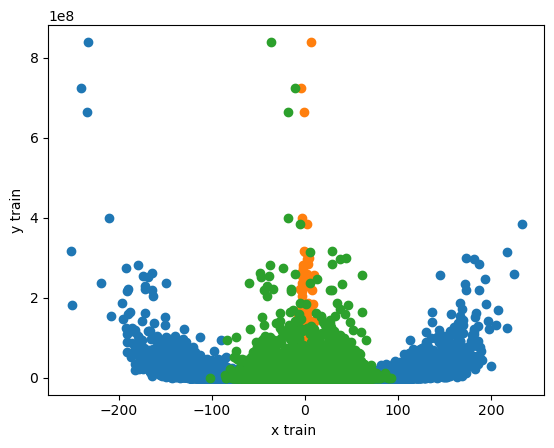

In [46]:
plt.scatter(x_train[:,2],y_train)
plt.ylabel('y train')
plt.xlabel('x train ')
plt.scatter(x_train[:,1],y_train)
plt.scatter(x_train[:,0],y_train)


Text(0, 0.5, 'cost')

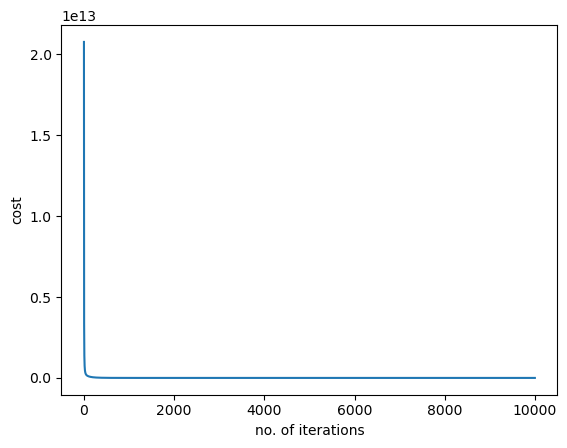

In [41]:
plt.plot(np.arange(10000),cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')

In [47]:
test=pd.read_csv('Polynomialdata_test.csv')
test

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,19691,-13.571554,2.931176,76.902716
9996,10512,-2.015904,-2.827700,4.999604
9997,17741,47.095192,-1.977461,39.044902
9998,18381,-1.808178,-0.693782,57.918628


In [48]:
testx=test.drop(['ID'],axis=1)
id=test['ID']
testx=testx.to_numpy()
testx.shape

(10000, 3)

In [49]:
testx_pol=pol_feat(testx,6)
pred_test=pred(testx_pol,w,b)

In [50]:
output=pd.DataFrame({'ID':id,'output':pred_test})

In [51]:
output.to_csv('polynomial_output.csv')

Text(0, 0.5, 'prediction')

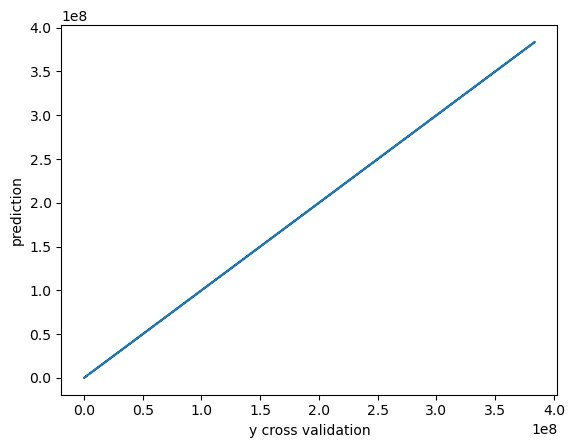

In [52]:
plt.plot(y_train_cv,predi1)
plt.xlabel('y cross validation')
plt.ylabel('prediction')